<a href="https://colab.research.google.com/github/bascr/TensorFlow-Developer-Certificate/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination od variables, even shorter, predicting a number.

In [1]:
# Import TesorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to a view and fit

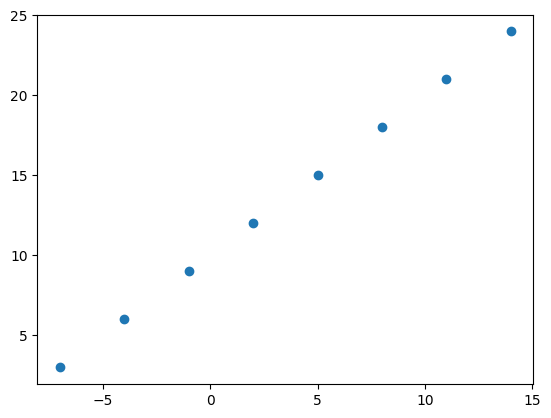

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24])

# Visualize it
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [8]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

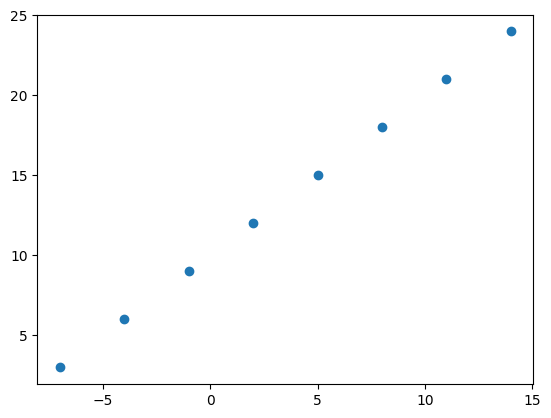

In [9]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layer, as well as the hidden layers of a deep lerning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential(
    layers=[tf.keras.layers.Dense(1)]
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sdg is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.9555 - mae: 11.9555
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.8230 - mae: 11.8230
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 11.6905 - mae: 11.6905
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.5580 - mae: 11.5580
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 11.4255 - mae: 11.4255


In [24]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [26]:
# Try yand make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 95ms/step


array([[10.526944]], dtype=float32)

In [27]:
y_pred + 11

array([[21.526943]], dtype=float32)

## Improving our model

We can imporve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [32]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model increasing the epochs
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 997ms/step - loss: 10.4223 - mae: 10.4223
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 10.2898 - mae: 10.2898
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 10.1573 - mae: 10.1573
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 10.0248 - mae: 10.0248
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 9.8923 - mae: 9.8923
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 9.7598 - mae: 9.7598
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 9.6273 - mae: 9.6273
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.4948 - mae: 9.4948
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 9.3623 - mae: 9.3623
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 9.2298 - mae: 9.2298
Epoch 11/100
1/1 [==============================] - 0s 35ms/

In [33]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [34]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 1s 561ms/step


array([[30.038864]], dtype=float32)

In [35]:
# Experimenting by changing the optimizer

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              metrics=["mae"])

# 3. Fit the model increasing the epochs
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 9.8085 - mae: 9.8085
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 9.7995 - mae: 9.7995
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 9.7905 - mae: 9.7905
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 9.7815 - mae: 9.7815
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 9.7725 - mae: 9.7725
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 9.7635 - mae: 9.7635
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 9.7545 - mae: 9.7545
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 9.7455 - mae: 9.7455
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 9.7365 - mae: 9.7365
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 9.7275 - mae: 9.7275
Epoch 11/100
1/1 [==============================] - 0s 25ms/step - loss

In [36]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 94ms/step


array([[21.530098]], dtype=float32)

In [38]:
# Let's add another change to improve the model

# 1. Create the model with an extra hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model increasing the epochs
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.1405 - mae: 13.1405
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.4828 - mae: 12.4828
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8206 - mae: 11.8206
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.1698 - mae: 11.1698
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4976 - mae: 10.4976
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 9.8063 - mae: 9.8063
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 9.0946 - mae: 9.0946
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3456 - mae: 8.3456
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.5547 - mae: 7.5547
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 6.7103 - mae: 6.7103
Epoch 11/100
1/1 [==============================] - 0s 29ms/s

In [39]:
# Check by predicting a value
model.predict([17.])

1/1 [==============================] - 0s 130ms/step


array([[31.621302]], dtype=float32)

Summarizing, the common ways to **improve** a deep model:

* **Adding layers**
* **Increase the number of hidden units**
* **Change the activation functions**
* **Change the optimization function**
* **Change the learning rate**
* **Fitting on more data**
* **Fitting for longer**